In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/rafly-sanjaya/machine_learning/main/processed_kelulusan.csv"
df = pd.read_csv(url)

#df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

sc = StandardScaler()
Xs = sc.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(
    Xs, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(20, 5) (4, 5) (5, 5)


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy","AUC"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[es], verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.4500 - accuracy: 0.5000 - loss: 0.7890 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.7014
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.5100 - accuracy: 0.5000 - loss: 0.7475 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - AUC: 0.6750 - accuracy: 0.5000 - loss: 0.7028 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - AUC: 0.6000 - accuracy: 0.5000 - loss: 0.7227 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.6837
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - AUC: 0.6800 - accuracy: 0.5000 - loss: 0.7014 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.6778
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - AUC: 0.4100 - accuracy: 0.5000 - loss: 0.7808 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.6721
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step -

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print("Test Acc:", acc, "AUC:", auc)

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

Test Acc: 1.0 AUC: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[2 0]
 [0 3]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         3

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5



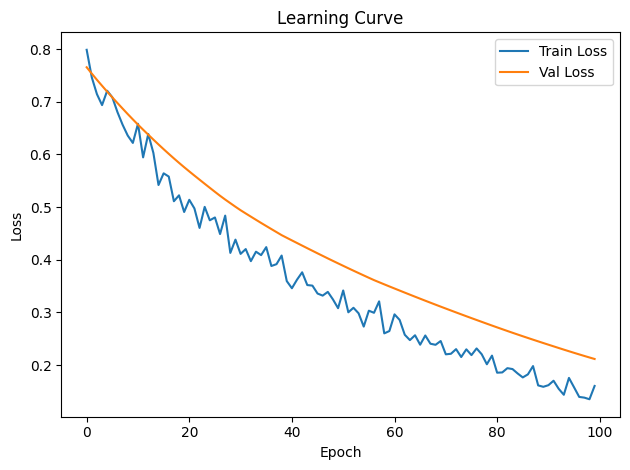

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.title("Learning Curve")
plt.tight_layout(); plt.savefig("learning_curve.png", dpi=120)

In [9]:
model_adam = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC"]
)


In [10]:
model_sgd = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_sgd.compile(
    optimizer=keras.optimizers.SGD(
        learning_rate=0.01, momentum=0.9
    ),
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC"]
)


In [11]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history_adam = model_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[es], verbose=1
)

history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[es], verbose=1
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.0200 - accuracy: 0.0500 - loss: 0.8654 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8034
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.0000e+00 - accuracy: 0.0500 - loss: 0.8843 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7870
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - AUC: 0.0450 - accuracy: 0.1000 - loss: 0.8152 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7711
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.2550 - accuracy: 0.2500 - loss: 0.7624 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7554
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.3400 - accuracy: 0.4000 - loss: 0.7271 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7405
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.2200 - accuracy: 0.3000 - loss: 0.7560 - val_AUC: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.7262
Epoch

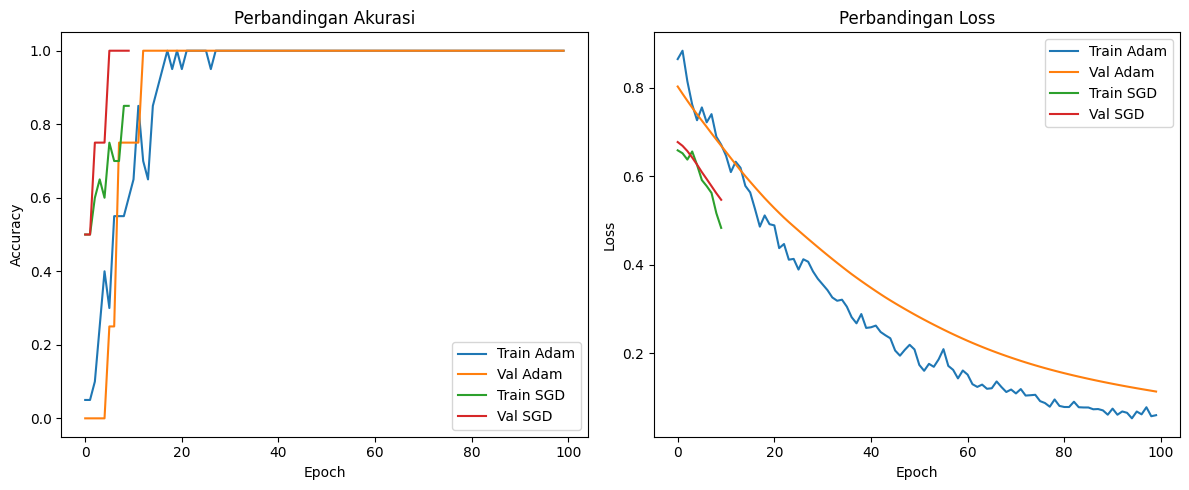

In [12]:
import matplotlib.pyplot as plt

# Plot perbandingan akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Train Adam')
plt.plot(history_adam.history['val_accuracy'], label='Val Adam')
plt.plot(history_sgd.history['accuracy'], label='Train SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Val SGD')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot perbandingan loss
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Train Adam')
plt.plot(history_adam.history['val_loss'], label='Val Adam')
plt.plot(history_sgd.history['loss'], label='Train SGD')
plt.plot(history_sgd.history['val_loss'], label='Val SGD')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Training dengan Adam_lr_0.001...


D:\Machine_Learning\venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training dengan Adam_lr_0.0001...

Training dengan SGD_lr_0.01...

Training dengan SGD_lr_0.001...


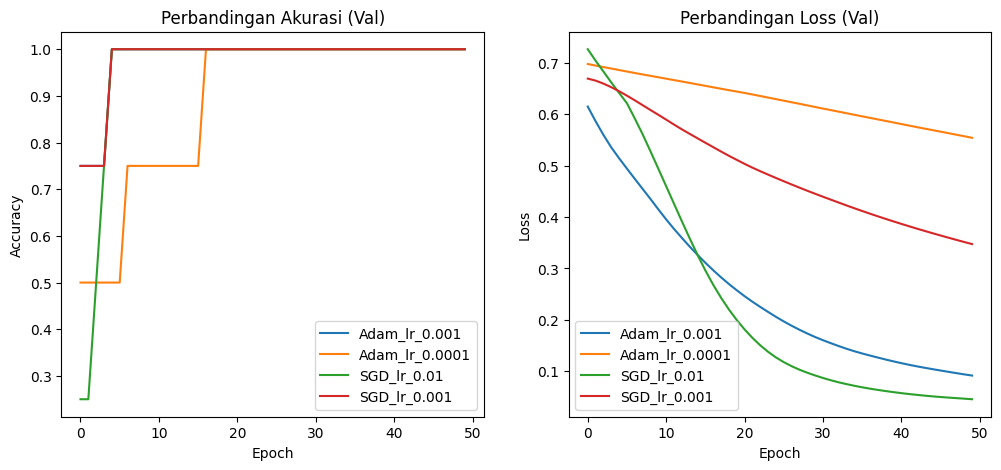

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- MODEL TEMPLATE ---
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(5,)),  # sesuaikan inputmu
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# --- OPTIMIZER DENGAN LEARNING RATE BERBEDA ---
optimizers = {
    "Adam_lr_0.001": keras.optimizers.Adam(learning_rate=0.001),
    "Adam_lr_0.0001": keras.optimizers.Adam(learning_rate=0.0001),
    "SGD_lr_0.01": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "SGD_lr_0.001": keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
}

# --- TEMPAT SIMPAN HASIL ---
histories = {}

# --- TRAINING LOOP ---
for name, opt in optimizers.items():
    print(f"\nTraining dengan {name}...")
    model = create_model()
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=50,
                        batch_size=16,
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    histories[name] = history

# --- VISUALISASI HASIL ---
plt.figure(figsize=(12,5))

# Akurasi
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Perbandingan Akurasi (Val)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f"{name}")
plt.title("Perbandingan Loss (Val)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()



Training config: baseline



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.0300 - accuracy: 0.4500 - loss: 0.7536 - val_AUC: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.7155
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - AUC: 0.3900 - accuracy: 0.5000 - loss: 0.7160 - val_AUC: 0.3750 - val_accuracy: 0.5000 - val_loss: 0.6992
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - AUC: 0.4750 - accuracy: 0.5500 - loss: 0.7004 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.6834
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - AUC: 0.7850 - accuracy: 0.6000 - loss: 0.6641 - val_AUC: 1.0000 - val_accuracy: 0.7500 - val_loss: 0.6677
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - AUC: 0.9050 - accuracy: 0.7000 - loss: 0.6374 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6538
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.9700 - accuracy: 0.7000 - loss: 0.6355 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6416
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/ste

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.0300 - accuracy: 0.4500 - loss: 0.7916 - val_AUC: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.7533
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.3900 - accuracy: 0.5000 - loss: 0.7539 - val_AUC: 0.3750 - val_accuracy: 0.5000 - val_loss: 0.7369
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - AUC: 0.4750 - accuracy: 0.5500 - loss: 0.7383 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.7211
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.7850 - accuracy: 0.6000 - loss: 0.7020 - val_AUC: 1.0000 - val_accuracy: 0.7500 - val_loss: 0.7053
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.9050 - accuracy: 0.7000 - loss: 0.6751 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6914
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.9700 - accuracy: 0.7000 - loss: 0.6733 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6791
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/ste

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step - AUC: 0.1700 - accuracy: 0.4000 - loss: 0.7604 - val_AUC: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7169
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4850 - accuracy: 0.5000 - loss: 0.7143 - val_AUC: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.7018
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - AUC: 0.1800 - accuracy: 0.5000 - loss: 0.7547 - val_AUC: 0.6250 - val_accuracy: 0.5000 - val_loss: 0.6870
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.5500 - accuracy: 0.6000 - loss: 0.7003 - val_AUC: 0.8750 - val_accuracy: 0.7500 - val_loss: 0.6724
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.7050 - accuracy: 0.6500 - loss: 0.6627 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6590
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.6350 - accuracy: 0.4000 - loss: 0.6760 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.6478
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,425 (13.38 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 288 (1.12 KB)

None
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.4100 - accuracy: 0.5000 - loss: 0.7787 - val_AUC: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7205
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - AUC: 0.7050 - accuracy: 0.5500 - loss: 0.6651 - val_AUC: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.7088
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - AUC: 0.6600 - accuracy: 0.6000 - loss: 0.7010 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - AUC: 0.9600 - accuracy: 0.6500 - loss: 0.5012 - val_AUC: 0.6250 - val_accuracy: 0.5000 - val_loss: 0.6856
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - AUC: 0.9350 - accuracy: 0.7500 - loss: 0.4866 - val_AUC: 0.7500 - val_accuracy: 0.5000 - val_loss: 0.6746
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - AUC: 1.0000 - accuracy: 0.8500 - loss: 0.4522 - val_AUC: 1.0000 - val_accuracy: 0.7500 - val_loss: 0.6637
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/

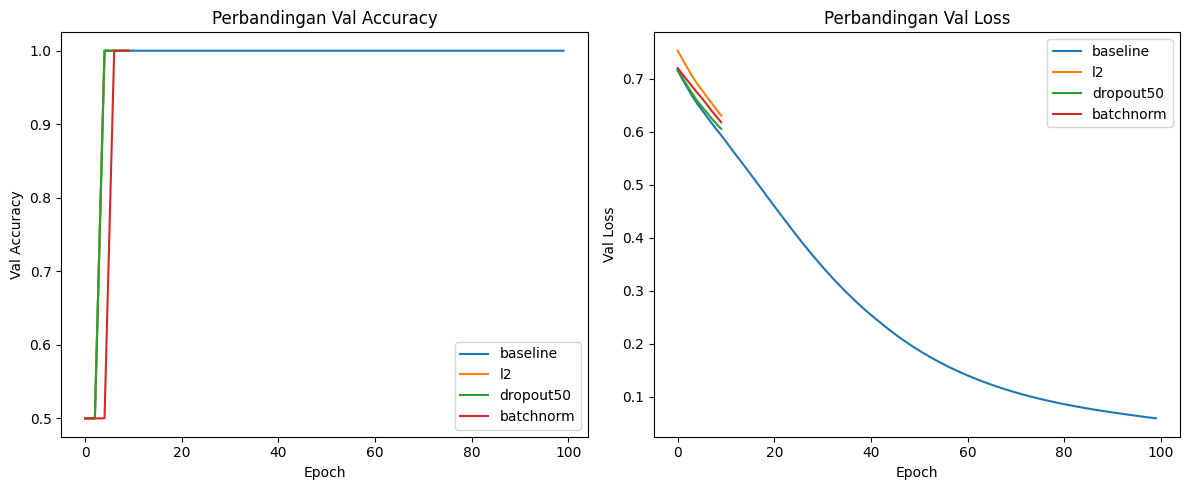

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Results for baseline ---
Test loss: 0.0030840295366942883 accuracy: 1.0 AUC(metric): 1.0 ROC-AUC: 1.0
Confusion matrix:
 [[2 0]
 [0 3]]
Classification report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    1.0000    1.0000         3

    accuracy                         1.0000         5
   macro avg     1.0000    1.0000    1.0000         5
weighted avg     1.0000    1.0000    1.0000         5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Results for l2 ---
Test loss: 0.7194859981536865 accuracy: 0.6000000238418579 AUC(metric): 0.3333333432674408 ROC-AUC: 0.3333333333333333
Confusion matrix:
 [[0 2]
 [0 3]]
Classification report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.6000    1.0000    0.7500         3

    accuracy                         0.6000         5
   macro avg 

D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

--- Results for dropout50 ---
Test loss: 0.6854219436645508 accuracy: 0.6000000238418579 AUC(metric): 0.25 ROC-AUC: 0.3333333333333333
Confusion matrix:
 [[0 2]
 [0 3]]
Classification report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.6000    1.0000    0.7500         3

    accuracy                         0.6000         5
   macro avg     0.3000    0.5000    0.3750         5
weighted avg     0.3600    0.6000    0.4500         5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

--- Results for batchnorm ---
Test loss: 0.6905571818351746 accuracy: 0.6000000238418579 AUC(metric): 0.1666666716337204 ROC-AUC: 0.16666666666666666
Confusion matrix:
 [[0 2]
 [0 3]]
Classification report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.6000    1.0000    0.7500         3

    accuracy                  

D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Machine_Learning\venv\lib

In [14]:
# Eksperimen regulasi: baseline, L2, Dropout(0.5), BatchNorm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np, random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

input_dim = X_train.shape[1]  # otomatis sesuai data

def build_model(config="baseline"):
    """
    config: one of "baseline", "l2", "dropout50", "batchnorm"
    returns compiled model
    """
    reg = None
    dropout_rate = 0.2
    use_bn = False
    
    if config == "l2":
        reg = regularizers.l2(1e-3)   # L2 weight decay
    elif config == "dropout50":
        dropout_rate = 0.5
    elif config == "batchnorm":
        use_bn = True
    
    inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation=None, kernel_regularizer=reg)(inputs)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    
    x = layers.Dense(16, activation=None, kernel_regularizer=reg)(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    
    # use Adam with lr=0.001 (good default from earlier experiments)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy', keras.metrics.AUC(name='AUC')])
    return model

configs = ["baseline", "l2", "dropout50", "batchnorm"]
histories = {}
models = {}

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train each config
for cfg in configs:
    print(f"\nTraining config: {cfg}")
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    model = build_model(cfg)
    models[cfg] = model
    print(model.summary())
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[es],
        verbose=1
    )
    histories[cfg] = history

# Plot comparison: val_accuracy and val_loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for cfg, h in histories.items():
    plt.plot(h.history['val_accuracy'], label=cfg)
plt.title('Perbandingan Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Val Accuracy'); plt.legend()

plt.subplot(1,2,2)
for cfg, h in histories.items():
    plt.plot(h.history['val_loss'], label=cfg)
plt.title('Perbandingan Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.legend()

plt.tight_layout()
plt.show()

# Evaluate each trained model on test set and print metrics
results = {}
for cfg, model in models.items():
    loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
    y_proba = model.predict(X_test).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba)
    results[cfg] = {
        'loss': float(loss),
        'accuracy': float(acc),
        'AUC_metric': float(auc),
        'roc_auc': float(roc_auc),
        'confusion_matrix': cm,
        'report': report
    }
    print(f"\n--- Results for {cfg} ---")
    print("Test loss:", loss, "accuracy:", acc, "AUC(metric):", auc, "ROC-AUC:", roc_auc)
    print("Confusion matrix:\n", cm)
    print("Classification report:\n", keras.utils.to_categorical if False else 
          classification_report(y_test, y_pred, digits=4))
